# Recomendaciones de libros

## Analisis exploratorio

In [50]:
#Librerias
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx


In [51]:
# Convertir csv a dataframe

books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

/tmp/ipykernel_7646/2611797240.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [52]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [53]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [54]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Datos posibles para relacionar
Book rating e ID del usuario, se puede personalizar viendo que a los mismos usuarios tienden a gustarle los mismos libros.
A las personas tienden a gustarles los libros de autores que ya les gustan

In [55]:
print("libros", books.columns)
print("ratings", ratings.columns)
print("usuarios", users.columns)


libros Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
ratings Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
usuarios Index(['User-ID', 'Location', 'Age'], dtype='object')


In [56]:
print("books", books.shape)
print("ratings", ratings.shape)
print("user", users.shape)

books (271360, 8)
ratings (1149780, 3)
user (278858, 3)


In [57]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [58]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [59]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [60]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


#### Poco significativo

In [61]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [62]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


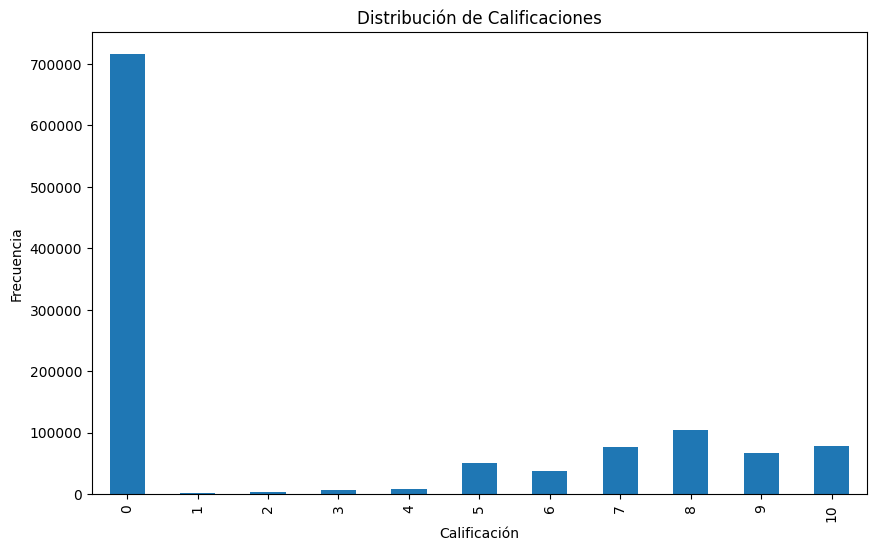

In [63]:
# Visualizar la distribución de las calificaciones
plt.figure(figsize=(10, 6))
ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

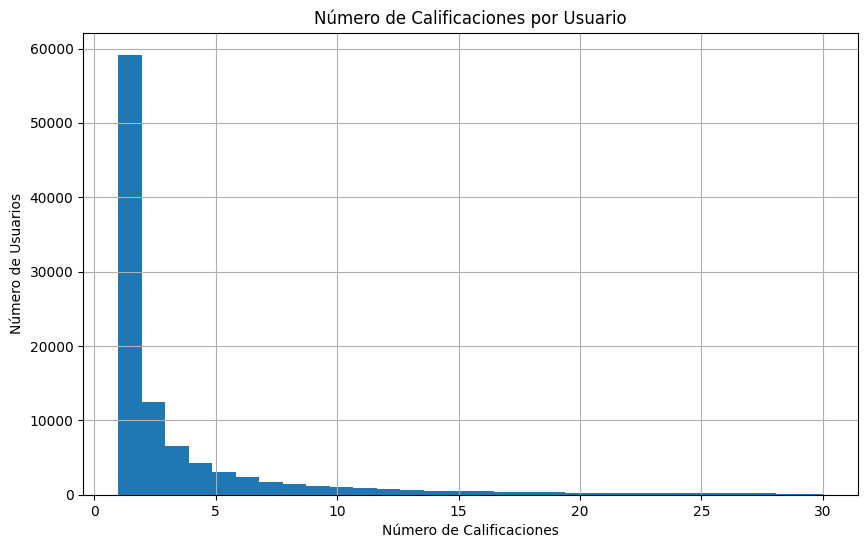

In [64]:
# Contar cuántas calificaciones ha dado cada usuario
user_rating_counts = ratings['User-ID'].value_counts()

# Ver la distribución de la cantidad de calificaciones por usuario
plt.figure(figsize=(10, 6))
user_rating_counts.hist(bins=30, range=(1,30))  # Limitando el histograma a usuarios que han dado hasta 30 calificaciones para mejor visualización
plt.title('Número de Calificaciones por Usuario')
plt.xlabel('Número de Calificaciones')
plt.ylabel('Número de Usuarios')
plt.show()

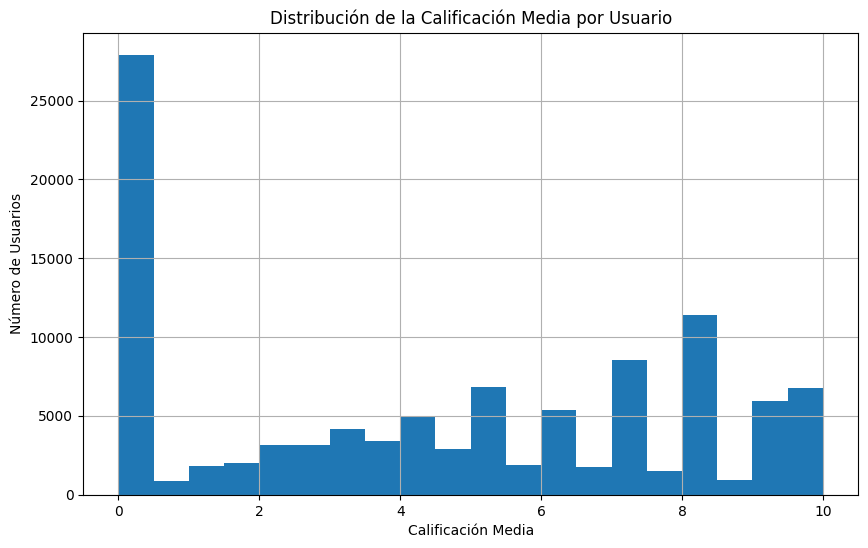

In [65]:
# Calcular la calificación media por usuario
user_mean_ratings = ratings.groupby('User-ID')['Book-Rating'].mean()

# Ver si las calificaciones varían significativamente de la media
plt.figure(figsize=(10, 6))
user_mean_ratings.hist(bins=20)
plt.title('Distribución de la Calificación Media por Usuario')
plt.xlabel('Calificación Media')
plt.ylabel('Número de Usuarios')
plt.show()

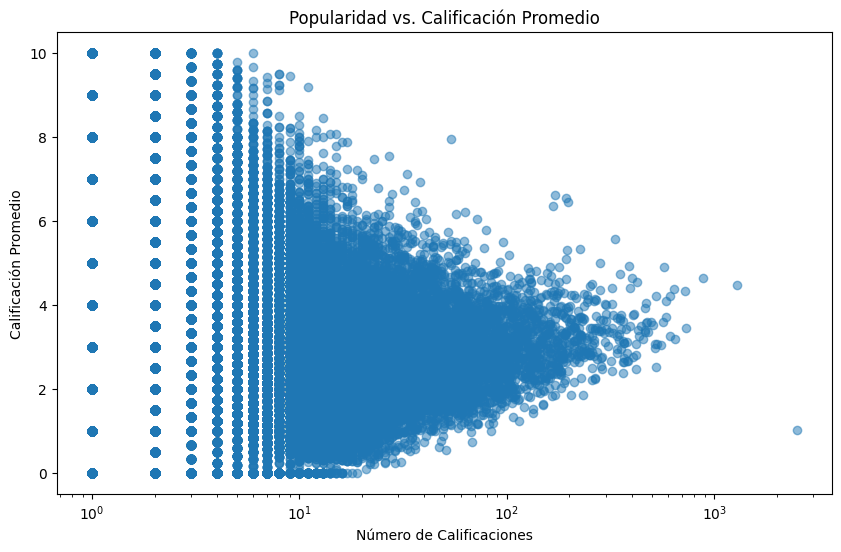

             Num_Ratings  Avg_Rating
Num_Ratings     1.000000   -0.006219
Avg_Rating     -0.006219    1.000000


In [66]:
# Calcular cuántas veces se ha calificado cada libro
book_popularity = ratings['ISBN'].value_counts()

# Unir la popularidad del libro (número de calificaciones) con su calificación promedio
book_avg_rating = ratings.groupby('ISBN')['Book-Rating'].mean()
popularity_rating_df = pd.DataFrame({'Num_Ratings': book_popularity, 'Avg_Rating': book_avg_rating})

# Gráfico de dispersión para evaluar la relación entre la popularidad y la calificación promedio
plt.figure(figsize=(10, 6))
plt.scatter(popularity_rating_df['Num_Ratings'], popularity_rating_df['Avg_Rating'], alpha=0.5)
plt.title('Popularidad vs. Calificación Promedio')
plt.xlabel('Número de Calificaciones')
plt.ylabel('Calificación Promedio')
plt.xscale('log')  # Escala logarítmica para una mejor visualización
plt.show()

# Analizar correlación
correlation = popularity_rating_df.corr()
print(correlation)


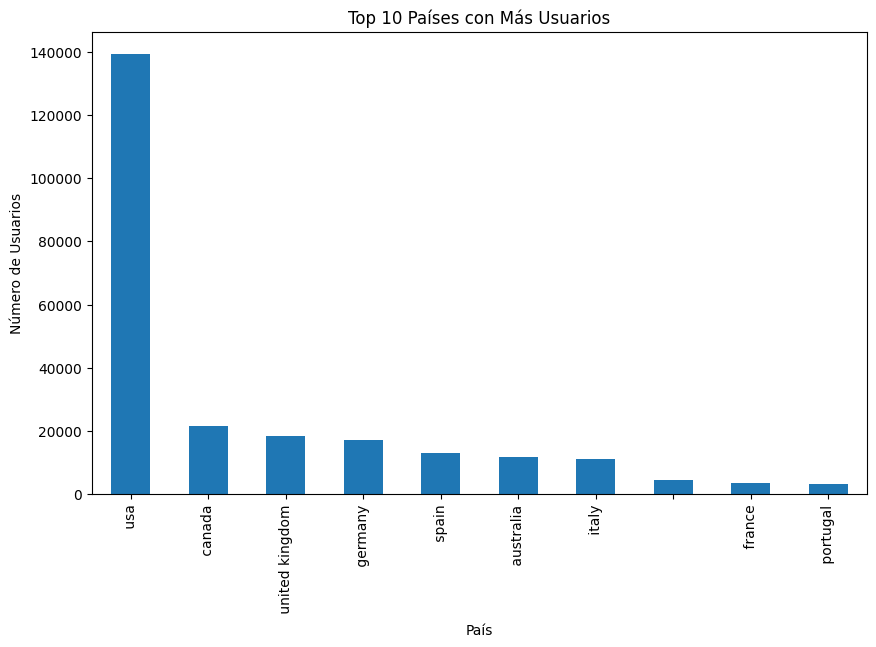

In [67]:
# Hacer un split y expandir asegura que no se asignen más de 3 columnas.
locations = users['Location'].str.split(',', expand=True)

# Rellenar las columnas faltantes con NaN para que todas las filas tengan al menos tres columnas.
locations = locations.reindex(columns=range(3))

# Ahora puedes renombrar las columnas y concatenar con el DataFrame 'users'.
locations.columns = ['City', 'State', 'Country']


# Ahora podemos contar cuántos usuarios hay por país
user_country_counts = locations['Country'].value_counts()

# Visualizar los países con más usuarios
user_country_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Países con Más Usuarios')
plt.xlabel('País')
plt.ylabel('Número de Usuarios')
plt.show()

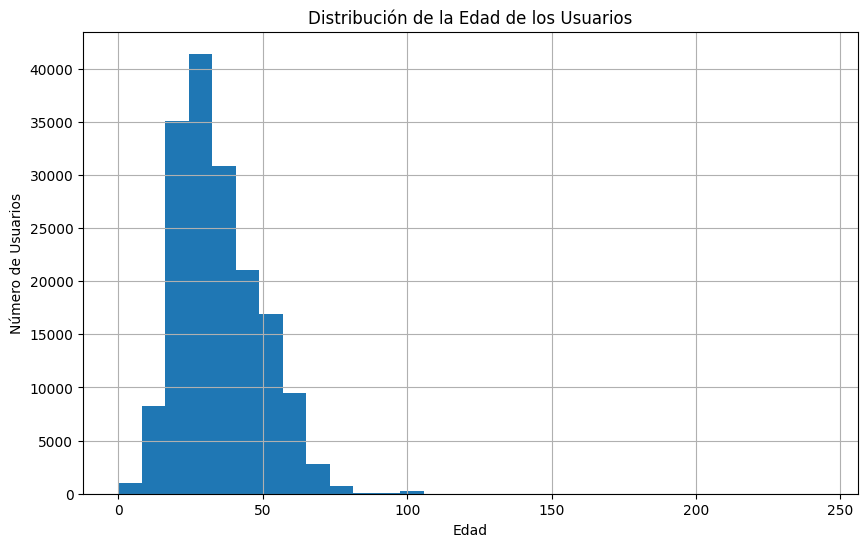

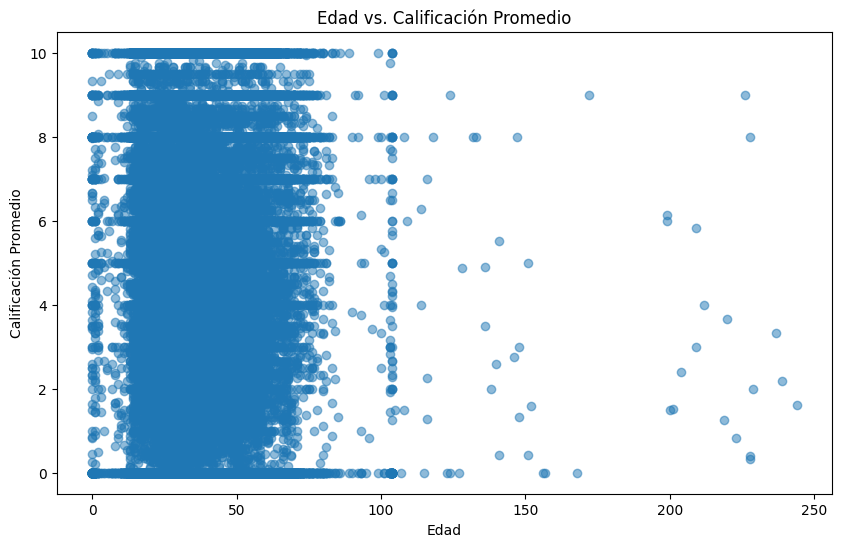

                 Age  Book-Rating
Age          1.00000      0.01529
Book-Rating  0.01529      1.00000


In [68]:
# Visualizar la distribución de la edad
plt.figure(figsize=(10, 6))
users['Age'].hist(bins=30)
plt.title('Distribución de la Edad de los Usuarios')
plt.xlabel('Edad')
plt.ylabel('Número de Usuarios')
plt.show()

# Ahora podríamos ver si hay alguna relación entre la edad y las calificaciones promedio de los usuarios
# Esto requiere combinar el dataset de usuarios con el dataset de calificaciones
# Suponiendo que ya tienes el dataframe de ratings como 'ratings'
# y que existe una columna 'Age' en el dataframe de usuarios:

# Primero calculamos la calificación media por usuario
user_avg_ratings = ratings.groupby('User-ID')['Book-Rating'].mean().reset_index()

# Ahora combinamos esto con la edad de los usuarios
user_ratings_age = pd.merge(user_avg_ratings, users[['User-ID', 'Age']], on='User-ID')

# Veamos si hay alguna correlación
plt.figure(figsize=(10, 6))
plt.scatter(user_ratings_age['Age'], user_ratings_age['Book-Rating'], alpha=0.5)
plt.title('Edad vs. Calificación Promedio')
plt.xlabel('Edad')
plt.ylabel('Calificación Promedio')
plt.show()

# También podríamos calcular la correlación directamente
correlation = user_ratings_age[['Age', 'Book-Rating']].corr()
print(correlation)

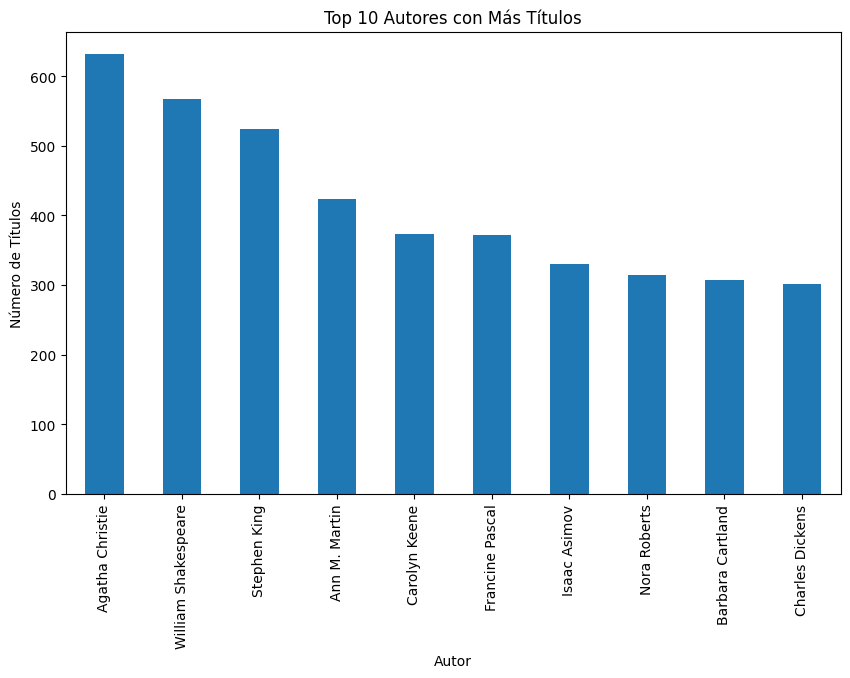

In [69]:
# Identificar los autores con más títulos
authors_count = books['Book-Author'].value_counts()
top_authors = authors_count.head(10)  # Puedes ajustar el número para ver más o menos autores

# Visualizar los autores con más títulos
top_authors.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Autores con Más Títulos')
plt.xlabel('Autor')
plt.ylabel('Número de Títulos')
plt.show()


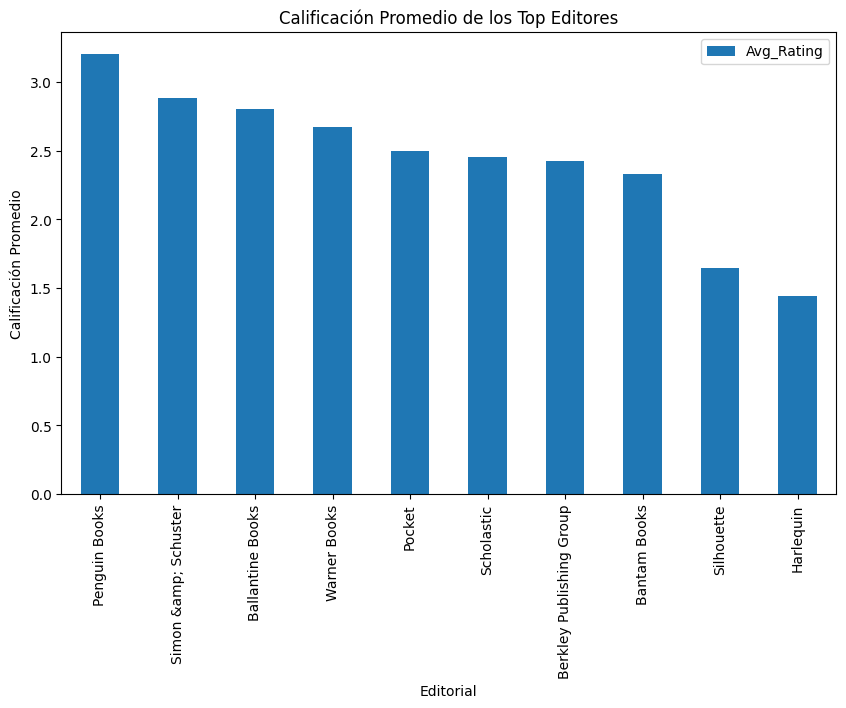

In [70]:
# Contar cuántas veces aparece cada editorial
publishers_count = books['Publisher'].value_counts()
top_publishers = publishers_count.head(10)  # Ajusta este valor según sea necesario

# Ahora vamos a examinar la relación de las editoriales con las calificaciones
# Primero, necesitamos combinar los datasets de libros y calificaciones
book_ratings = pd.merge(books, ratings, on='ISBN')

# Calcular la calificación promedio de cada libro
book_ratings['Avg_Rating'] = book_ratings.groupby('ISBN')['Book-Rating'].transform('mean')

# Luego calculamos la calificación promedio para cada editorial
publisher_ratings = book_ratings.groupby('Publisher')['Avg_Rating'].mean().reset_index()

# Filtramos para incluir solo las editoriales top
top_publisher_ratings = publisher_ratings[publisher_ratings['Publisher'].isin(top_publishers.index)]

# Ordenar las editoriales por calificación promedio y visualizar
top_publisher_ratings = top_publisher_ratings.sort_values('Avg_Rating', ascending=False)
top_publisher_ratings.plot(kind='bar', x='Publisher', y='Avg_Rating', figsize=(10, 6))
plt.title('Calificación Promedio de los Top Editores')
plt.xlabel('Editorial')
plt.ylabel('Calificación Promedio')
plt.show()


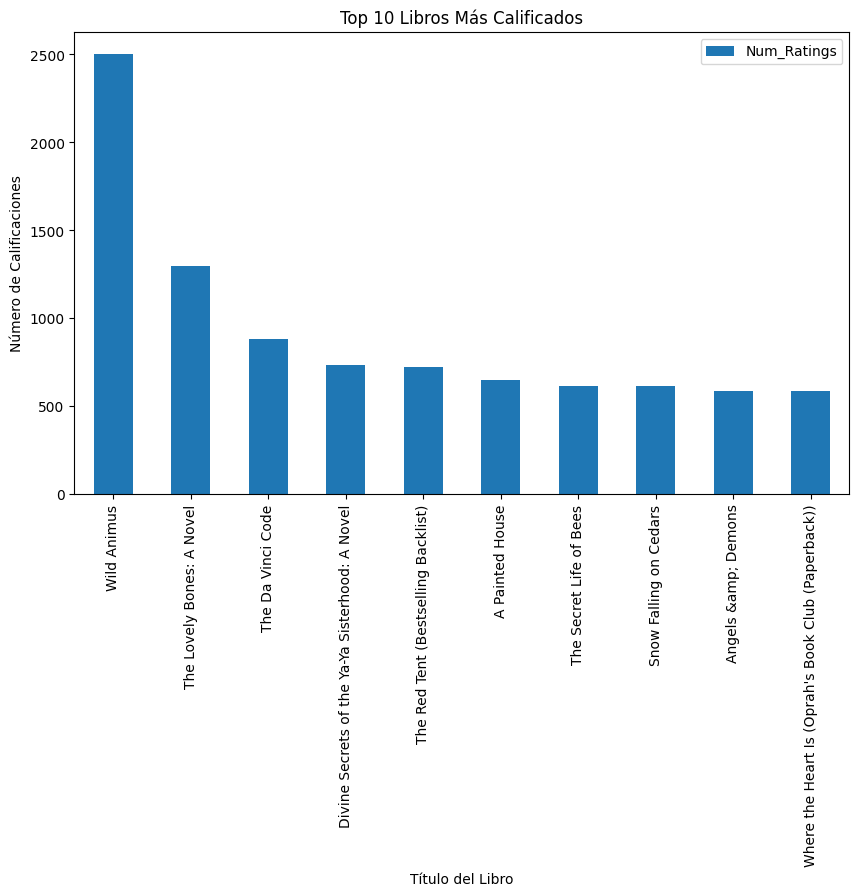

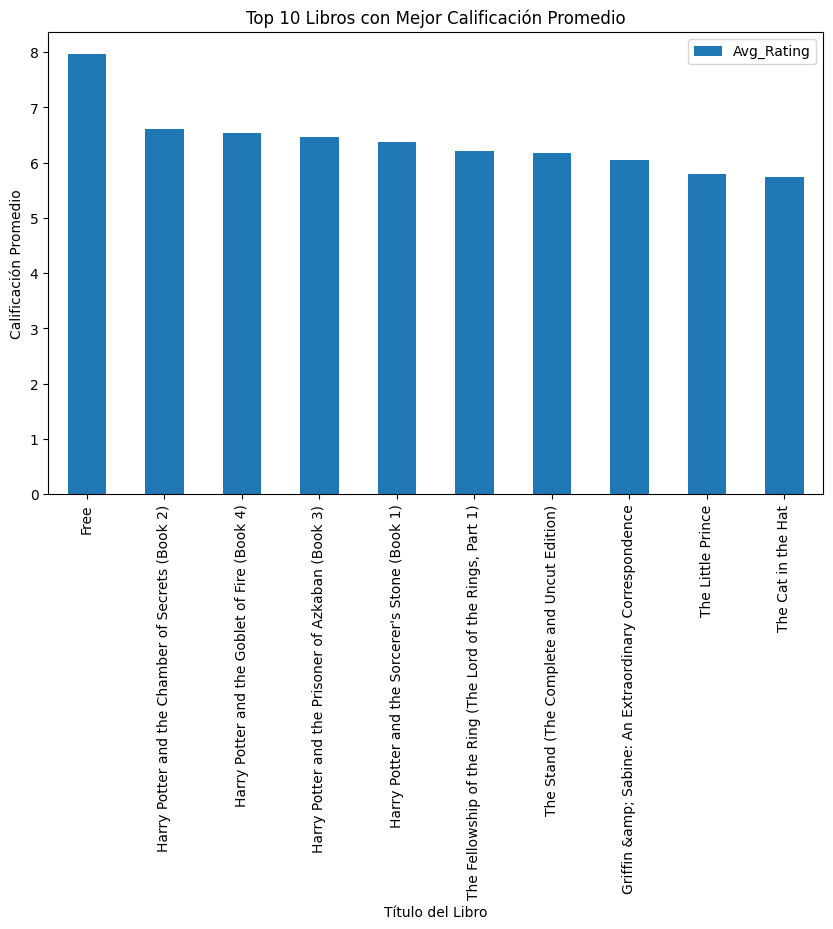

In [71]:
# Calcular el número total de calificaciones por libro y la calificación promedio
book_stats = ratings.groupby('ISBN').agg({'Book-Rating': ['count', 'mean']})
book_stats.columns = ['Num_Ratings', 'Avg_Rating']
book_stats = book_stats.reset_index()

# Podemos ahora combinarlo con los datos de los libros para obtener títulos y otros detalles
books_with_stats = pd.merge(books, book_stats, on='ISBN')

# Determinar los libros más populares por número de calificaciones
most_rated_books = books_with_stats.sort_values('Num_Ratings', ascending=False).head(10)

# Visualizar los libros más populares por número de calificaciones
most_rated_books.plot(kind='bar', x='Book-Title', y='Num_Ratings', figsize=(10, 6))
plt.title('Top 10 Libros Más Calificados')
plt.xlabel('Título del Libro')
plt.ylabel('Número de Calificaciones')
plt.show()

# Determinar los libros mejor calificados (considerando solo libros con un número significativo de calificaciones)
# Podrías, por ejemplo, solo considerar libros con más de 50 calificaciones
books_with_high_ratings = books_with_stats[books_with_stats['Num_Ratings'] > 50].sort_values('Avg_Rating', ascending=False).head(10)

# Visualizar los libros con mejor calificación promedio
books_with_high_ratings.plot(kind='bar', x='Book-Title', y='Avg_Rating', figsize=(10, 6))
plt.title('Top 10 Libros con Mejor Calificación Promedio')
plt.xlabel('Título del Libro')
plt.ylabel('Calificación Promedio')
plt.show()


In [72]:
#Estadisticas integradas
# Combinar usuarios y calificaciones
user_ratings = pd.merge(users, ratings, on='User-ID')

# Combinar el resultado con libros
combined_data = pd.merge(user_ratings, books, on='ISBN')

# Analizar preferencias por país, por ejemplo
country_preferences = combined_data.groupby(['Country', 'Book-Author'])['Book-Rating'].mean().sort_values(ascending=False).reset_index()


KeyError: 'Country'

In [ ]:
# Asegurarse de que la edad es un número y está razonablemente limpia
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')
users.dropna(subset=['Age'], inplace=True)  # Eliminar valores NA si son significativos

# Ahora combinar los datasets como se hizo previamente
combined_data = pd.merge(pd.merge(users, ratings, on='User-ID'), books, on='ISBN')

# Correlación entre la edad y la calificación
age_rating_corr = combined_data['Age'].corr(combined_data['Book-Rating'])
print(f"La correlación entre la edad y la calificación es: {age_rating_corr}")

# Podrías también querer ver si ciertas edades prefieren ciertos autores o géneros
# Esto requeriría un análisis más complejo, posiblemente agrupando las edades y luego analizando las calificaciones promedio por grupo de edad.


La correlación entre la edad y la calificación es: -0.02525207169004499


In [ ]:
# Usaremos `book_stats` que calculamos previamente
# Identificar libros "únicos" como aquellos que tienen menos calificaciones que un cierto umbral
unique_books_threshold = 10  # Por ejemplo, libros con menos de 10 calificaciones
unique_books = book_stats[book_stats['Num_Ratings'] < unique_books_threshold]

# Ahora combinar con el conjunto de datos de calificaciones
unique_books_ratings = pd.merge(unique_books, ratings, on='ISBN')

# Comparar las calificaciones promedio de libros únicos vs. no únicos
avg_rating_unique = unique_books_ratings['Book-Rating'].mean()
avg_rating_general = ratings['Book-Rating'].mean()

print(f"Calificación promedio para libros únicos: {avg_rating_unique}")
print(f"Calificación promedio general: {avg_rating_general}")


Calificación promedio para libros únicos: 2.7992628231264782
Calificación promedio general: 2.8669501991685364


### Primer red neuronal

In [ ]:
ratings['User-ID'] = ratings['User-ID'].astype(str)
users['User-ID'] = users['User-ID'].astype(str)

In [73]:
# Calculamos la calificación promedio y la frecuencia de calificaciones de cada libro
book_ratings_mean = ratings.groupby('ISBN')['Book-Rating'].mean()
book_ratings_count = ratings.groupby('ISBN')['Book-Rating'].count()

# Creamos un nuevo dataframe con ISBN, Calificación Promedio y Frecuencia de Calificaciones
books_features = pd.DataFrame({
    'Average-Rating': book_ratings_mean,
    'Rating-Count': book_ratings_count
}).reset_index()
print(books_features.head())
# Normalizamos las características
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
books_features[['Average-Rating', 'Rating-Count']] = scaler.fit_transform(books_features[['Average-Rating', 'Rating-Count']])

# Verificamos el nuevo dataframe
books_features.describe()


          ISBN  Average-Rating  Rating-Count
0   0330299891             3.0             2
1   0375404120             1.5             2
2   0586045007             0.0             1
3   9022906116             3.5             2
4   9032803328             0.0             1


,Average-Rating,Rating-Count
count,340556.000000,340556.000000
mean,0.294359,0.000950
std,0.334557,0.004973
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.180000,0.000000
75%,0.500000,0.000400
max,1.000000,1.000000


In [75]:
# Seleccionamos los 70 libros más calificados
top_books = book_ratings_count.sort_values(ascending=False).head(70).index

# Preparamos la matriz de salida Y
# Para simplificar, asignaremos 1 a los libros que han sido calificados por el usuario, y 0 si no
ratings_matrix = ratings[ratings['ISBN'].isin(top_books)].pivot_table(index='User-ID', columns='ISBN', values='Book-Rating', fill_value=0)

# Convertimos las calificaciones a binario: 1 si el libro ha sido calificado, 0 si no
ratings_matrix = (ratings_matrix > 0).astype(int)

# Mostramos el resultado
ratings_matrix.head()


ISBN,0060502258,0060928336,0060930535,0060934417,0060976845,006101351X,0140293248,0142001740,0156027321,0312195516,...,0671510053,067976402X,0679781587,068484477X,0684872153,0743418174,0786868716,0804106304,0971880107,1400034779
User-ID,,,,,,,,,,,,,,,,,,,,,
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Definimos la arquitectura del modelo con TensorFlow Keras
model = Sequential([
    Dense(64, input_shape=(2,), activation='relu'),  # Capa de entrada y primera capa oculta
    Dense(64, activation='relu'),                    # Segunda capa oculta
    Dense(70, activation='sigmoid')                  # Capa de salida
])

# Compilamos el modelo con Adam optimizer y binary cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                192       
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 70)                4550      
                                                                 
Total params: 8902 (34.77 KB)
Trainable params: 8902 (34.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

# Tomamos solo los N libros más calificados
N = 1000  # Puedes ajustar este número según tu memoria disponible
top_N_books = ratings['ISBN'].value_counts().index[:N]

# Tomamos solo los M usuarios que han dado más calificaciones
M = 10000  # Puedes ajustar este número según tu memoria disponible
top_M_users = ratings['User-ID'].value_counts().index[:M]
filtered_ratings = ratings.copy()
# Filtramos el DataFrame de calificaciones
filtered_ratings = ratings[ratings['ISBN'].isin(top_N_books) & ratings['User-ID'].isin(top_M_users)]

filtered_ratings['User-ID'] = filtered_ratings['User-ID'].astype('category')
filtered_ratings['ISBN'] = filtered_ratings['ISBN'].astype('category')

# Crea una matriz de interacciones usuario-libro como una matriz dispersa
user_book_matrix = csr_matrix((filtered_ratings['Book-Rating'], 
                               (filtered_ratings['User-ID'].cat.codes, 
                                filtered_ratings['ISBN'].cat.codes)))


user_book_matrix_binary = (user_book_matrix > 0).astype(int)
# Divide los datos en conjuntos de entrenamiento y validación
# Ten en cuenta que train_test_split no puede dividir directamente las matrices dispersas
# así que primero dividimos los índices y luego usamos esos índices para hacer las divisiones
# Divide los índices de los usuarios en conjuntos de entrenamiento y validación
user_indices = np.arange(user_book_matrix.shape[0])  # Debe ser el número de usuarios
train_user_indices, val_user_indices = train_test_split(user_indices, test_size=0.2, random_state=42)

# Utiliza los índices de usuario para crear los conjuntos de entrenamiento y validación de X
X_train = user_book_matrix[train_user_indices, :]
X_val = user_book_matrix[val_user_indices, :]

# Utiliza los índices de usuario para crear los conjuntos de entrenamiento y validación de Y
Y_train = user_book_matrix_binary[train_user_indices, :]
Y_val = user_book_matrix_binary[val_user_indices, :]

# Convierte las matrices dispersas en densas para el entrenamiento y la validación
X_train_dense = X_train.toarray()
Y_train_dense = Y_train.toarray()
X_val_dense = X_val.toarray()
Y_val_dense = Y_val.toarray()

# Define la arquitectura de la red neuronal
model = Sequential([
    Dense(256, input_dim=X_train_dense.shape[1], activation='relu'),
    Dense(256, activation='relu'),
    Dense(Y_train_dense.shape[1], activation='sigmoid')
])

# Compila el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrena el modelo con los datos densos
history = model.fit(X_train_dense, Y_train_dense, epochs=10, batch_size=64, validation_data=(X_val_dense, Y_val_dense))

# Evalúa el modelo con los datos densos
val_loss, val_accuracy = model.evaluate(X_val_dense, Y_val_dense)
print(f'Validation accuracy: {val_accuracy}')

/tmp/ipykernel_7646/3989672490.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ratings['User-ID'] = filtered_ratings['User-ID'].astype('category')
/tmp/ipykernel_7646/3989672490.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ratings['ISBN'] = filtered_ratings['ISBN'].astype('category')


Epoch 1/10
105/105 [==============================] - 2s 13ms/step - loss: 0.1498 - accuracy: 0.0122 - val_loss: 0.0358 - val_accuracy: 0.0143
Epoch 2/10
105/105 [==============================] - 1s 12ms/step - loss: 0.0326 - accuracy: 0.0179 - val_loss: 0.0295 - val_accuracy: 0.0208
Epoch 3/10
105/105 [==============================] - 1s 12ms/step - loss: 0.0286 - accuracy: 0.0241 - val_loss: 0.0279 - val_accuracy: 0.0423
Epoch 4/10
105/105 [==============================] - 1s 11ms/step - loss: 0.0267 - accuracy: 0.0488 - val_loss: 0.0266 - val_accuracy: 0.0768
Epoch 5/10
105/105 [==============================] - 1s 11ms/step - loss: 0.0252 - accuracy: 0.0777 - val_loss: 0.0254 - val_accuracy: 0.0893
Epoch 6/10
105/105 [==============================] - 1s 12ms/step - loss: 0.0233 - accuracy: 0.1257 - val_loss: 0.0240 - val_accuracy: 0.1524
Epoch 7/10
105/105 [==============================] - 1s 12ms/step - loss: 0.0215 - accuracy: 0.1742 - val_loss: 0.0227 - val_accuracy: 0.1958

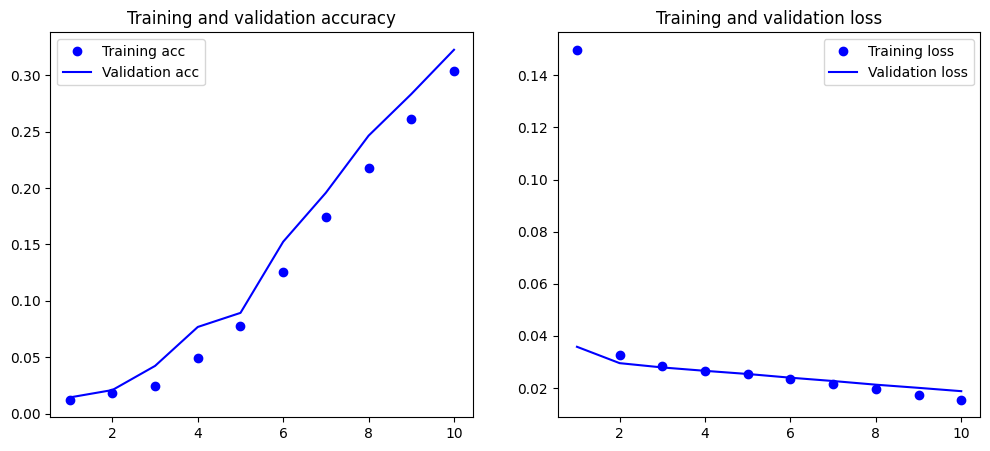

In [90]:
import matplotlib.pyplot as plt

# Suponiendo que `history` es el objeto retornado por `model.fit()`
# y contiene el historial de entrenamiento, realizamos algunas gráficas.

# Reemplaza `history.history['...']` con los datos de tu historial de entrenamiento si es diferente.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Gráfico de precisión de entrenamiento y validación
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Gráfico de pérdida de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### Segunda red

In [5]:
import pandas as pd

# Cargar los archivos CSV
books_path = 'Books.csv'
ratings_path = 'Ratings.csv'
users_path = 'Users.csv'

# Debido a posibles problemas con los encodings y las primeras líneas que podrían contener información no deseada,
# usaremos 'latin-1' encoding y saltaremos las primeras líneas si es necesario.
try:
    books_df = pd.read_csv(books_path, encoding='latin-1')
    ratings_df = pd.read_csv(ratings_path, encoding='latin-1')
    users_df = pd.read_csv(users_path, encoding='latin-1')
except Exception as e:
    # Si hay un error al cargar, nos dará una idea de qué revisar
    print(f"An error occurred: {e}")

# Vamos a inspeccionar las primeras filas de cada dataframe para entender mejor su contenido y estructura
(books_df.head(), ratings_df.head(), users_df.head())


C:\Users\javie\AppData\Local\Temp\ipykernel_27544\100737379.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(books_path, encoding='latin-1')


(         ISBN                                         Book-Title  \
 0  0195153448                                Classical Mythology   
 1  0002005018                                       Clara Callan   
 2  0060973129                               Decision in Normandy   
 3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
 4  0393045218                             The Mummies of Urumchi   
 
             Book-Author Year-Of-Publication                   Publisher  \
 0    Mark P. O. Morford                2002     Oxford University Press   
 1  Richard Bruce Wright                2001       HarperFlamingo Canada   
 2          Carlo D'Este                1991             HarperPerennial   
 3      Gina Bari Kolata                1999        Farrar Straus Giroux   
 4       E. J. W. Barber                1999  W. W. Norton &amp; Company   
 
                                          Image-URL-S  \
 0  http://images.amazon.com/images/P/0195153448.0...   
 1  http://i

In [7]:
# Paso 2: Preprocesamiento de la columna de edad
# Imputaremos los valores faltantes con la mediana para minimizar el impacto de posibles valores atípicos
median_age = users_df['Age'].median()
users_df['Age'] = users_df['Age'].fillna(median_age)

# Normalizamos la columna de edad utilizando la normalización Min-Max para que los valores estén entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

age_scaler = MinMaxScaler()
users_df['Age'] = age_scaler.fit_transform(users_df[['Age']])

# Paso 3: Procesamiento de la columna de localización
# Dividimos la columna de localización en ciudad, estado y país
location_split = users_df['Location'].str.split(',', expand=True)
users_df['City'] = location_split[0].str.strip()
users_df['State'] = location_split[1].str.strip()
users_df['Country'] = location_split[2].str.strip()

# Asumiremos que la información del país es suficiente para este ejemplo y haremos codificación one-hot para el país
# Para los propósitos de demostración, limitaremos el número de países a los 100 más comunes para evitar una alta dimensionalidad
top_countries = users_df['Country'].value_counts().index[:100]
users_df.loc[~users_df['Country'].isin(top_countries), 'Country'] = 'Other'
country_one_hot = pd.get_dummies(users_df['Country'], prefix='Country')

# Añadimos las columnas one-hot al dataframe de usuarios
users_df = pd.concat([users_df, country_one_hot], axis=1)

# Ahora echemos un vistazo a cómo quedaron los dataframes después del preprocesamiento
users_df.head()


,User-ID,Location,Age,City,State,Country,Country_,Country_Other,Country_albania,Country_andorra,...,Country_trinidad and tobago,Country_turkey,Country_ukraine,Country_united arab emirates,Country_united kingdom,Country_usa,Country_venezuela,Country_vietnam,Country_wales,Country_yugoslavia
0,1,"nyc, new york, usa",0.131148,nyc,new york,usa,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2,"stockton, california, usa",0.073770,stockton,california,usa,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,3,"moscow, yukon territory, russia",0.131148,moscow,yukon territory,russia,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,"porto, v.n.gaia, portugal",0.069672,porto,v.n.gaia,portugal,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,"farnborough, hants, united kingdom",0.131148,farnborough,hants,united kingdom,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [8]:
# Merge user data with ratings data on 'User-ID'
user_ratings_df = pd.merge(ratings_df, users_df, on='User-ID')

# Merge the user_ratings data with books data on 'ISBN'
full_dataset_df = pd.merge(user_ratings_df, books_df, on='ISBN')

# Para simplificar el modelo y enfocarnos en las columnas relevantes, seleccionaremos solo las necesarias
# Asumiremos que las URLs de las imágenes y el año de publicación no son relevantes para la recomendación basada en contenido
# También eliminaremos la localización original y las columnas de ciudad y estado ya que hemos codificado el país
columns_to_keep = ['User-ID', 'ISBN', 'Book-Rating', 'Age'] + list(country_one_hot.columns) + ['Book-Title', 'Book-Author', 'Publisher']

# Creamos un nuevo dataframe con solo las columnas seleccionadas
model_dataset_df = full_dataset_df[columns_to_keep]

# Ahora revisamos las primeras filas del dataframe final para asegurarnos de que todo esté correcto
model_dataset_df.head()


,User-ID,ISBN,Book-Rating,Age,Country_,Country_Other,Country_albania,Country_andorra,Country_argentina,Country_australia,...,Country_united arab emirates,Country_united kingdom,Country_usa,Country_venezuela,Country_vietnam,Country_wales,Country_yugoslavia,Book-Title,Book-Author,Publisher
0,276725,034545104X,0,0.131148,False,False,False,False,False,False,...,False,False,True,False,False,False,False,Flesh Tones: A Novel,M. J. Rose,Ballantine Books
1,2313,034545104X,5,0.094262,False,False,False,False,False,False,...,False,False,True,False,False,False,False,Flesh Tones: A Novel,M. J. Rose,Ballantine Books
2,6543,034545104X,0,0.139344,False,False,False,False,False,False,...,False,False,True,False,False,False,False,Flesh Tones: A Novel,M. J. Rose,Ballantine Books
3,8680,034545104X,5,0.008197,False,False,False,False,False,False,...,False,False,True,False,False,False,False,Flesh Tones: A Novel,M. J. Rose,Ballantine Books
4,10314,034545104X,9,0.131148,False,False,False,False,False,False,...,False,False,True,False,False,False,False,Flesh Tones: A Novel,M. J. Rose,Ballantine Books


In [9]:
# Contamos el número de valores únicos para las características categóricas de interés
unique_book_titles = model_dataset_df['Book-Title'].nunique()
unique_book_authors = model_dataset_df['Book-Author'].nunique()
unique_publishers = model_dataset_df['Publisher'].nunique()

unique_book_titles, unique_book_authors, unique_publishers


(241071, 101587, 16729)

In [10]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



# Preprocesamiento de la columna de edad
median_age = users_df['Age'].median()
users_df['Age'] = users_df['Age'].fillna(median_age)
age_scaler = MinMaxScaler()
users_df['Age'] = age_scaler.fit_transform(users_df[['Age']])

# Procesamiento de la columna de localización
location_split = users_df['Location'].str.split(',', expand=True)
users_df['City'] = location_split[0].str.strip()
users_df['State'] = location_split[1].str.strip()
users_df['Country'] = location_split[2].str.strip()
top_countries = users_df['Country'].value_counts().index[:100]
users_df.loc[~users_df['Country'].isin(top_countries), 'Country'] = 'Other'
country_one_hot = pd.get_dummies(users_df['Country'], prefix='Country')
users_df = pd.concat([users_df, country_one_hot], axis=1)

# Fusionar los datos de usuarios y calificaciones
user_ratings_df = pd.merge(ratings_df, users_df, on='User-ID')
full_dataset_df = pd.merge(user_ratings_df, books_df, on='ISBN')

# Seleccionar columnas relevantes para el modelo
columns_to_keep = ['User-ID', 'ISBN', 'Book-Rating', 'Age'] + list(country_one_hot.columns) + ['Book-Title', 'Book-Author', 'Publisher']
model_dataset_df = full_dataset_df[columns_to_keep]

# Contamos el número de valores únicos para las características categóricas de interés
unique_book_titles = model_dataset_df['Book-Title'].nunique()
unique_book_authors = model_dataset_df['Book-Author'].nunique()
unique_publishers = model_dataset_df['Publisher'].nunique()

unique_book_titles, unique_book_authors, unique_publishers


(241071, 101587, 16729)

In [11]:
# Asignamos un índice único a cada título de libro, autor y editorial.
book_title_to_index = {title: idx for idx, title in enumerate(model_dataset_df['Book-Title'].unique())}
book_author_to_index = {author: idx for idx, author in enumerate(model_dataset_df['Book-Author'].unique())}
publisher_to_index = {publisher: idx for idx, publisher in enumerate(model_dataset_df['Publisher'].unique())}

# Creamos columnas en el dataframe para los índices
model_dataset_df['Book-Title-Index'] = model_dataset_df['Book-Title'].map(book_title_to_index)
model_dataset_df['Book-Author-Index'] = model_dataset_df['Book-Author'].map(book_author_to_index)
model_dataset_df['Publisher-Index'] = model_dataset_df['Publisher'].map(publisher_to_index)

# Dividimos los datos en conjuntos de entrenamiento y prueba.
# Para las características del libro, usaremos solo los índices para los embeddings.
# Para las características del usuario, usaremos la edad y la ubicación codificada.
features = ['Age'] + list(country_one_hot.columns) + ['Book-Title-Index', 'Book-Author-Index', 'Publisher-Index']
target = 'Book-Rating'

X = model_dataset_df[features]
y = model_dataset_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Revisamos las primeras filas del conjunto de entrenamiento para asegurarnos de que todo esté correcto
X_train.head(), y_train.head()


C:\Users\javie\AppData\Local\Temp\ipykernel_27544\4007491319.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_dataset_df['Book-Title-Index'] = model_dataset_df['Book-Title'].map(book_title_to_index)
C:\Users\javie\AppData\Local\Temp\ipykernel_27544\4007491319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_dataset_df['Book-Author-Index'] = model_dataset_df['Book-Author'].map(book_author_to_index)
C:\Users\javie\AppData\Local\Temp\ipykernel_27544\4007491319.py:9: SettingWithCopyWarning: 
A

(              Age  Country_  Country_  Country_Other  Country_Other  \
 889977   0.102459     False     False          False          False   
 1009639  0.209016     False     False          False          False   
 874463   0.139344     False     False          False          False   
 974903   0.151639     False     False          False          False   
 439400   0.122951     False     False          False          False   
 
          Country_albania  Country_albania  Country_andorra  Country_andorra  \
 889977             False            False            False            False   
 1009639            False            False            False            False   
 874463             False            False            False            False   
 974903             False            False            False            False   
 439400             False            False            False            False   
 
          Country_argentina  ...  Country_venezuela  Country_vietnam  \
 889977     

In [12]:
from sklearn.feature_extraction import FeatureHasher

# Definimos el número de dimensiones de las características después del hashing
n_features = 10

# Inicializamos los hashers para cada característica categórica
hasher_title = FeatureHasher(n_features=n_features, input_type='string')
hasher_author = FeatureHasher(n_features=n_features, input_type='string')
hasher_publisher = FeatureHasher(n_features=n_features, input_type='string')

# Reducimos aún más N y M
N_reduced = 500  # libros más calificados
M_reduced = 5000  # usuarios que han dado más calificaciones

# Obtenemos los top N_reduced libros y top M_reduced usuarios en términos de calificaciones
top_N_books_reduced = ratings_df['ISBN'].value_counts().index[:N_reduced]
top_M_users_reduced = ratings_df['User-ID'].value_counts().index[:M_reduced]

# Filtramos el dataset de calificaciones para incluir solo estos libros y usuarios
filtered_dataset_reduced = model_dataset_df[
    model_dataset_df['ISBN'].isin(top_N_books_reduced) &
    model_dataset_df['User-ID'].isin(top_M_users_reduced)
]

# Intentamos el hashing de nuevo con el conjunto de datos reducido
try:
    # Aplicamos el hashing a las columnas categóricas
    # Suponiendo que filtered_dataset_reduced['Book-Title'] es una serie de pandas con títulos de libros como strings
    hashed_titles_reduced = hasher_title.transform(filtered_dataset_reduced['Book-Title'].astype('str').map(lambda x: x.split()))
    hashed_authors_reduced = hasher_author.transform(filtered_dataset_reduced['Book-Author'].astype('str').map(lambda x: x.split()))
    hashed_publishers_reduced = hasher_publisher.transform(filtered_dataset_reduced['Publisher'].astype('str').map(lambda x: x.split()))

    # Convertimos los hashings a DataFrames para poder unirlos de nuevo al dataset principal
    hashed_titles_df_reduced = pd.DataFrame(hashed_titles_reduced.toarray(), index=filtered_dataset_reduced.index)
    hashed_authors_df_reduced = pd.DataFrame(hashed_authors_reduced.toarray(), index=filtered_dataset_reduced.index)
    hashed_publishers_df_reduced = pd.DataFrame(hashed_publishers_reduced.toarray(), index=filtered_dataset_reduced.index)

    # Unimos los hashings al dataframe principal
    filtered_dataset_reduced = filtered_dataset_reduced.drop(['Book-Title', 'Book-Author', 'Publisher'], axis=1)
    model_dataset_with_hashed_reduced = pd.concat([filtered_dataset_reduced, hashed_titles_df_reduced, hashed_authors_df_reduced, hashed_publishers_df_reduced], axis=1)

    # Mostramos el resultado
    success = True
except MemoryError as e:
    # Si aún hay un error de memoria, lo capturaremos aquí
    success = False
    print(f"An error occurred: {e}")

model_dataset_with_hashed_reduced.head() if success else "Hashing failed."


,User-ID,ISBN,Book-Rating,Age,Country_,Country_,Country_Other,Country_Other,Country_albania,Country_albania,...,0,1,2,3,4,5,6,7,8,9
184,278418,038550120X,0,0.131148,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
185,6251,038550120X,0,0.131148,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
186,8234,038550120X,0,0.180328,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
187,8250,038550120X,0,0.139344,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
188,11224,038550120X,0,0.209016,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [14]:
# Definimos la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
# Capa de salida para la regresión
model.add(Dense(1, activation='linear'))

In [15]:
# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])


In [20]:
import numpy as np

#convertir x_train para ser de numpy
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
X_train_filled = X_train_numeric.fillna(X_train_numeric.mean())
X_train_np = X_train_filled.to_numpy()

#convertir y_train para ser de numpy
y_train_numeric = y_train.apply(pd.to_numeric, errors='coerce')
y_train_filled = y_train_numeric.fillna(y_train_numeric.mean())
y_train_np = y_train_filled.to_numpy()

X_train_np = X_train_np.astype('float32')
y_train_np = y_train_np.astype('float32')

# Entrenamos el modelo
history = model.fit(X_train_np, y_train_np, epochs=10, batch_size=64, validation_split=0.2)

# history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
10312/10312 [==============================] - 10s 975us/step - loss: 14.8587 - mae: 3.5738 - val_loss: 14.8793 - val_mae: 3.5757
Epoch 2/10
10312/10312 [==============================] - 10s 957us/step - loss: 14.8591 - mae: 3.5738 - val_loss: 14.8794 - val_mae: 3.5791
Epoch 3/10
10312/10312 [==============================] - 10s 977us/step - loss: 14.8596 - mae: 3.5738 - val_loss: 14.8816 - val_mae: 3.5889
Epoch 4/10
10312/10312 [==============================] - 10s 956us/step - loss: 15.0155 - mae: 3.5739 - val_loss: 14.8798 - val_mae: 3.5830
Epoch 5/10
10312/10312 [==============================] - 10s 980us/step - loss: 14.8586 - mae: 3.5740 - val_loss: 14.8797 - val_mae: 3.5805
Epoch 6/10
10312/10312 [==============================] - 10s 953us/step - loss: 15.0039 - mae: 3.5754 - val_loss: 14.8818 - val_mae: 3.5644
Epoch 7/10
10312/10312 [==============================] - 10s 961us/step - loss: 14.8628 - mae: 3.5731 - val_loss: 14.8791 - val_mae: 3.5761
Epoch 8/10
10